In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./household_power_consumption.csv')

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [160]:
data.isna().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [161]:
# fill nan values with median

median = data['Sub_metering_3'].median()

data['Sub_metering_3'].fillna(median, inplace=True)

In [162]:
data.isna().sum().sum()

0

In [163]:
import ydata_profiling as pp

In [164]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [165]:
data = data[data['Global_active_power'] != '?']


In [166]:
len(data)

256869

In [167]:
data['Date'] = data['Date'].apply(lambda x: int(x.replace('/', '')) if isinstance(x, str) else x)
data['Time'] = data['Time'].apply(lambda x: int(x.replace(':', '')) if isinstance(x, str) else x)


C:\Users\stefa\AppData\Local\Temp\ipykernel_27772\2390974737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(lambda x: int(x.replace('/', '')) if isinstance(x, str) else x)
C:\Users\stefa\AppData\Local\Temp\ipykernel_27772\2390974737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = data['Time'].apply(lambda x: int(x.replace(':', '')) if isinstance(x, str) else x)


In [168]:
print(data['Date'])
print(data['Time'])

0            1107
1            1107
2            1107
3            1107
4            1107
           ...   
260635    3062007
260636    3062007
260637    3062007
260638    3062007
260639    3062007
Name: Date, Length: 256869, dtype: int64
0              0
1            100
2            200
3            300
4            400
           ...  
260635    235500
260636    235600
260637    235700
260638    235800
260639    235900
Name: Time, Length: 256869, dtype: int64


In [169]:
columns_to_convert = ['Global_active_power',  'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

data[columns_to_convert] = data[columns_to_convert].astype(float)

C:\Users\stefa\AppData\Local\Temp\ipykernel_27772\1083615260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_convert] = data[columns_to_convert].astype(float)


In [170]:
data.dtypes

Date                       int64
Time                       int64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: >

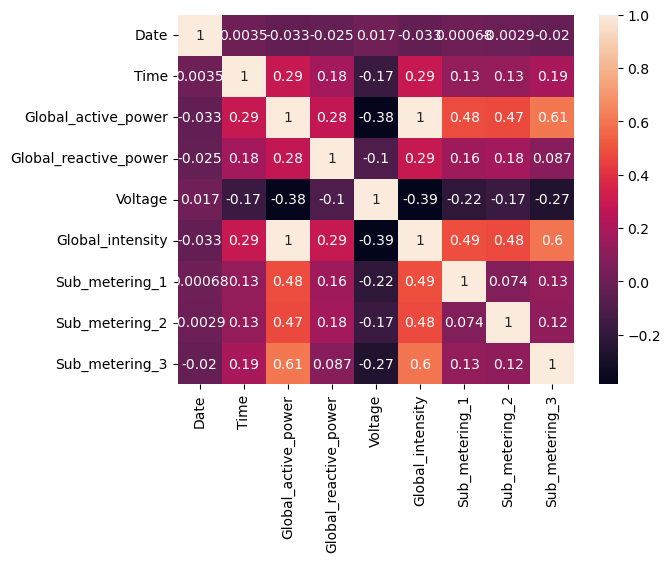

In [172]:
sns.heatmap(data.corr(), annot=True)

In [173]:
# global_intensity  and global_active_power are highly correlated so we will delete one to improve the model performance

data.drop(columns=['Global_intensity'], axis=1, inplace=True)

C:\Users\stefa\AppData\Local\Temp\ipykernel_27772\2455263535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Global_intensity'], axis=1, inplace=True)


In [174]:
data = data[~((data['Sub_metering_1'] == '0') & (data['Sub_metering_2'] == '0') & (data['Sub_metering_3'] == 0.0))]


In [175]:
len(data)

256869

In [176]:
zeroes_1 = (data['Sub_metering_1']=='0').sum() / len(data) * 100
zeroes_2 = (data['Sub_metering_2']=='0').sum() / len(data) * 100
zeroes_3 = (data['Sub_metering_3']== 0).sum() / len(data) * 100

print(zeroes_1, zeroes_2, zeroes_3)

0.0 0.0 66.13215296513009


In [177]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1107,0,2.580,0.136,241.97,0.0,0.0,0.0
1,1107,100,2.552,0.100,241.75,0.0,0.0,0.0
2,1107,200,2.550,0.100,241.64,0.0,0.0,0.0
3,1107,300,2.550,0.100,241.71,0.0,0.0,0.0
4,1107,400,2.554,0.100,241.98,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
260635,3062007,235500,2.880,0.360,239.01,0.0,0.0,18.0
260636,3062007,235600,2.892,0.358,238.86,0.0,0.0,17.0
260637,3062007,235700,2.882,0.280,239.05,0.0,0.0,18.0
260638,3062007,235800,2.660,0.290,238.98,0.0,0.0,18.0


In [178]:
middle_index = len(data) // 2
data = data.loc[~((data.index > middle_index) & (data['Sub_metering_1'] == '0'))]

In [179]:
len(data)

256869

In [180]:
zeroes_1 = (data['Sub_metering_1']=='0').sum() / len(data) * 100
zeroes_2 = (data['Sub_metering_2']=='0').sum() / len(data) * 100
zeroes_3 = (data['Sub_metering_3']== 0).sum() / len(data) * 100

print(zeroes_1, zeroes_2, zeroes_3)

0.0 0.0 66.13215296513009


In [181]:
from sklearn.model_selection import train_test_split

X = data.drop('Global_active_power', axis=1)
Y = data['Global_active_power']

X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [183]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [184]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [185]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [186]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [187]:
# Evaluate the models
from sklearn.metrics import mean_squared_error, r2_score

mse_lr = mean_squared_error(Y_test, y_pred_lr)
r2_lr = r2_score(Y_test, y_pred_lr)

mse_dt = mean_squared_error(Y_test, y_pred_dt)
r2_dt = r2_score(Y_test, y_pred_dt)

mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

mse_xgb = mean_squared_error(Y_test, y_pred_xgb)
r2_xgb = r2_score(Y_test, y_pred_xgb)

In [188]:
print(f'LR -> Mean Squared Error: {mse_lr}, R2_score: {r2_lr}')
print(f'DT -> Mean Squared Error: {mse_dt}, R2_score: {r2_dt}')
print(f'RF -> Mean Squared Error: {mse_rf}, R2_score: {r2_rf}')
print(f'XGB -> Mean Squared Error: {mse_xgb}, R2_score: {r2_xgb}')

LR -> Mean Squared Error: 0.4087931287408178, R2_score: 0.7044059392626663
DT -> Mean Squared Error: 0.1057900211001674, R2_score: 0.9235043357533708
RF -> Mean Squared Error: 0.28478667472472274, R2_score: 0.7940737167352551
XGB -> Mean Squared Error: 0.21448347022506525, R2_score: 0.8449092328920753


In [189]:
# Add cross-validation to the best model (DecisionTreeRegressor) to try and improve the performance

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_mse_scores = -cv_scores

mean_mse = cv_mse_scores.mean()
std_mse = cv_mse_scores.std()
best_mse = min(cv_mse_scores)


print(f"Cross-Validation Mean MSE: {mean_mse:.4f}")
print(f"Cross-Validation Standard Deviation of MSE: {std_mse:.4f}")
print(f"The best MSE is: {best_mse:.4f}")


Cross-Validation Mean MSE: 0.1331
Cross-Validation Standard Deviation of MSE: 0.0061
The best MSE is: 0.1253
